In [1]:
import os
import pickle

from neutrinomass.completions import EffectiveOperator, Completion
from neutrinomass.database import ExoticField
from neutrinomass.database import ModelDataFrame, EXOTICS, TERMS, MVDF
from neutrinomass.completions import EFF_OPERATORS
from neutrinomass.completions import DERIV_EFF_OPERATORS

In [2]:
DATA_PATH = "/home/garj/work/neutrinomass/neutrinomass/database"
DATA = pickle.load(open(os.path.join(DATA_PATH, "unfiltered.p"), "rb"))

In [24]:
UNF = ModelDataFrame.new(data=DATA, exotics=EXOTICS, terms=TERMS)

STR_UNF = UNF.drop_duplicates(["stringent_num"], keep="first")
LAGS = len(STR_UNF)
print(f"Number of neutrino-mass mechanisms: {LAGS}")

DEMO_UNF = UNF.drop_duplicates(["democratic_num"], keep="first")
MODELS = len(DEMO_UNF)
print(f"Number of models: {MODELS}")

STR_MVDF = MVDF.drop_duplicates(["stringent_num"], keep="first")
print(f"Number of filtered neutrino-mass mechanisms: {len(STR_MVDF)}")

DEMO_MVDF = MVDF.drop_duplicates(["democratic_num"], keep="first")
print(f"Number of filtered neutrino-mass mechanisms: {len(DEMO_MVDF)}")

Number of neutrino-mass mechanisms: 430810
Number of models: 141989
Number of filtered neutrino-mass mechanisms: 11483
Number of filtered neutrino-mass mechanisms: 11216


In [4]:
FIL_DF = MVDF.drop_duplicates(['democratic_num', 'dim'], keep="first")
UNF_DF = UNF.drop_duplicates(['democratic_num', 'dim'], keep="first")

print(f"After filtering, there are {len(FIL_DF[FIL_DF['dim'] == 5])} models derived from dimension-5 operators.")
print(f"After filtering, there are {len(FIL_DF[FIL_DF['dim'] == 9])} models derived from dimension-9 operators.")
print(f"After filtering, there are {len(FIL_DF[FIL_DF['dim'] == 11])} models derived from dimension-11 operators.")
print(f"The total of these is {len(FIL_DF[FIL_DF['dim'] == 5]) + len(FIL_DF[FIL_DF['dim'] == 9]) + len(FIL_DF[FIL_DF['dim'] == 11])}")

OPS = {**EFF_OPERATORS, **DERIV_EFF_OPERATORS}
labels, total, demo, dimensions = [], [], [], []
for k in OPS:
    labels.append(k)
    total.append(len(UNF_DF[UNF_DF["op"] == k]))
    demo.append(len(FIL_DF[FIL_DF["op"] == k]))
    dimensions.append(OPS[k].mass_dimension)

After filtering, there are 3 models derived from dimension-5 operators.
After filtering, there are 244 models derived from dimension-9 operators.
After filtering, there are 10969 models derived from dimension-11 operators.
The total of these is 11216


In [13]:
NHL = STR_UNF.terms[("F,00,0,0,0", "H", "L")]
NHSigma = STR_UNF.terms[("F,00,2,0,0", "H", "L")]
HHXi1 = STR_UNF.terms[("H", "H", "S,00,2,-1,0")]
LLXi1 = STR_UNF.terms[("L", "L", "S,00,2,1,0")]

N = STR_UNF.exotics["F,00,0,0,0"]
Sigma = STR_UNF.exotics["F,00,2,0,0"]
Xi1 = STR_UNF.exotics["S,00,2,1,0"]

In [14]:
N_NHL_lags = len(STR_UNF[STR_UNF["stringent_num"] % NHL == 0])
N_other_lags = len(STR_UNF[(STR_UNF["stringent_num"] % NHL != 0) & (STR_UNF["democratic_num"] % N == 0)])

Sigma_NHSigma_lags = len(STR_UNF[STR_UNF["stringent_num"] % NHSigma == 0])
Sigma_other_lags = len(STR_UNF[(STR_UNF["stringent_num"] % NHSigma != 0) & (STR_UNF["democratic_num"] % Sigma == 0)])

Xi1_HHXi1_lags = len(STR_UNF[STR_UNF["stringent_num"] % HHXi1 == 0])
Xi1_LLXi1_lags = len(STR_UNF[STR_UNF["stringent_num"] % LLXi1 == 0])
Xi1_both_lags = len(STR_UNF[(STR_UNF["stringent_num"] % HHXi1 == 0) & (STR_UNF["stringent_num"] % LLXi1 == 0)])
Xi1_other_lags = len(STR_UNF[(STR_UNF["stringent_num"] % HHXi1 != 0) & (STR_UNF["stringent_num"] % LLXi1 != 0) & (STR_UNF["democratic_num"] % Xi1 == 0)])

In [22]:
N_models = len(DEMO_UNF[DEMO_UNF["democratic_num"] % N == 0])
Sigma_models = len(DEMO_UNF[DEMO_UNF["democratic_num"] % Sigma == 0])
Xi1_models = len(DEMO_UNF[DEMO_UNF["democratic_num"] % Xi1 == 0])

In [25]:
# latex table
print(r"""
  \begin{tabular}{ccll}
    \toprule
    Field & Interactions & Lagrangians & Collected models \\
    \midrule
    \multirow{2}{*}{$N \sim (\mathbf{1}, \mathbf{1}, 0)_{F}$} & $L H N$ & %s (%s) & \multirow{2}{*}{%s (%s)} \\
                & Other & %s (%s) &  \\
    \midrule
    \multirow{2}{*}{$\Sigma \sim (\mathbf{1}, \mathbf{3}, 0)_{F}$} & $L H \Sigma$ & %s (%s) & \multirow{2}{*}{%s (%s)} \\
                & Other & %s (%s) &  \\
    \midrule
    \multirow{4}{*}{$\Xi_{1} \sim (\mathbf{1}, \mathbf{3}, 1)_{S}$} & $L L \Xi_{1}$ & %s (%s) & \multirow{4}{*}{%s (%s)} \\
                & $H H \Xi_{1}^{\dagger}$ & %s (%s) &  \\
                & Both & %s (%s) &  \\
                & Other & %s (%s) &  \\
    \bottomrule
  \end{tabular}
""" % (
    f"{N_NHL_lags:,}", f"{100 * N_NHL_lags / LAGS:.1f}\%",
    f"{N_models:,}", f"{100 * N_models / MODELS:.1f}\%",
    f"{N_other_lags:,}", f"{100 * N_other_lags / LAGS:.1f}\%",

    
    f"{Sigma_NHSigma_lags:,}", f"{100 * Sigma_NHSigma_lags / LAGS:.1f}\%",
    f"{Sigma_models:,}", f"{100 * Sigma_models / MODELS:.1f}\%",
    f"{Sigma_other_lags:,}", f"{100 * Sigma_other_lags / LAGS:.1f}\%",

    
    f"{Xi1_LLXi1_lags:,}", f"{100 * Xi1_LLXi1_lags / LAGS:.1f}\%",
    f"{Xi1_models:,}", f"{100 * Xi1_models / MODELS:.1f}\%",
    f"{Xi1_HHXi1_lags:,}", f"{100 * Xi1_HHXi1_lags / LAGS:.1f}\%",
    f"{Xi1_both_lags:,}", f"{100 * Xi1_both_lags / LAGS:.1f}\%",
    f"{Xi1_other_lags:,}", f"{100 * Xi1_other_lags / LAGS:.1f}\%",
)
)


  \begin{tabular}{ccll}
    \toprule
    Field & Interactions & Lagrangians & Collected models \\
    \midrule
    \multirow{2}{*}{$N \sim (\mathbf{1}, \mathbf{1}, 0)_{F}$} & $L H N$ & 51,245 (11.9\%) & \multirow{2}{*}{17,139 (12.1\%)} \\
                & Other & 12,433 (2.9\%) &  \\
    \midrule
    \multirow{2}{*}{$\Sigma \sim (\mathbf{1}, \mathbf{3}, 0)_{F}$} & $L H \Sigma$ & 87,535 (20.3\%) & \multirow{2}{*}{31,629 (22.3\%)} \\
                & Other & 28,157 (6.5\%) &  \\
    \midrule
    \multirow{4}{*}{$\Xi_{1} \sim (\mathbf{1}, \mathbf{3}, 1)_{S}$} & $L L \Xi_{1}$ & 59,791 (13.9\%) & \multirow{4}{*}{51,576 (36.3\%)} \\
                & $H H \Xi_{1}^{\dagger}$ & 95,410 (22.1\%) &  \\
                & Both & 10,323 (2.4\%) &  \\
                & Other & 30,761 (7.1\%) &  \\
    \bottomrule
  \end{tabular}



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.tight_layout()

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]}
)

sns.set_palette("muted")

<Figure size 432x288 with 0 Axes>

In [24]:
latex_labels = []
for l in labels:
    if "pp" in l:
        new_l = l.replace("pp", "^{\prime\prime}")
    elif "p" in l:
        new_l = l.replace("p", "^\prime")
    else:
        new_l = l
    latex_labels.append("$" + new_l + "$")

filter_bar_df = pd.DataFrame(data={
    "Operator": latex_labels, 
    "Unfiltered": total, 
    "Democratic": demo,
    "Dimension": dimensions
})

demo_5 = sum(filter_bar_df[filter_bar_df["Dimension"] == 5]["Democratic"])
demo_7 = sum(filter_bar_df[filter_bar_df["Dimension"] == 7]["Democratic"])
demo_9 = sum(filter_bar_df[filter_bar_df["Dimension"] == 9]["Democratic"])
demo_11 = sum(filter_bar_df[filter_bar_df["Dimension"] == 11]["Democratic"])


unf_5 = sum(filter_bar_df[filter_bar_df["Dimension"] == 5]["Unfiltered"])
unf_7 = sum(filter_bar_df[filter_bar_df["Dimension"] == 7]["Unfiltered"])
unf_9 = sum(filter_bar_df[filter_bar_df["Dimension"] == 9]["Unfiltered"])
unf_11 = sum(filter_bar_df[filter_bar_df["Dimension"] == 11]["Unfiltered"])

barplot_df = pd.DataFrame(
    {'Dimension': [5, 7, 9, 11], 
     'Democratic': [demo_5, demo_7, demo_9, demo_11], 
     'Unfiltered': [unf_5-demo_5, unf_7-demo_7, unf_9-demo_9, unf_11-demo_11]}
)

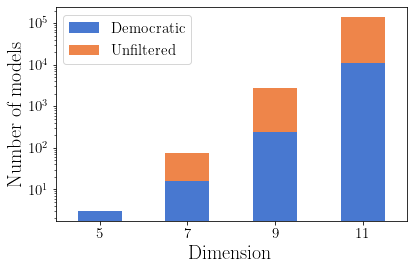

In [26]:
ax = barplot_df.plot.bar(x="Dimension", stacked=True, rot=0)
ax.set_yscale("log")
ax.set_ylabel("Number of models")
plt.tight_layout()
plt.savefig("/home/garj/filter_barchart_dimension.pdf")
plt.savefig("/home/garj/filter_barchart_dimension.png")

/usr/local/easybuild-2019/easybuild/software/mpi/gcc/8.3.0/openmpi/3.1.4/jupyter/1.0.0-python-3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


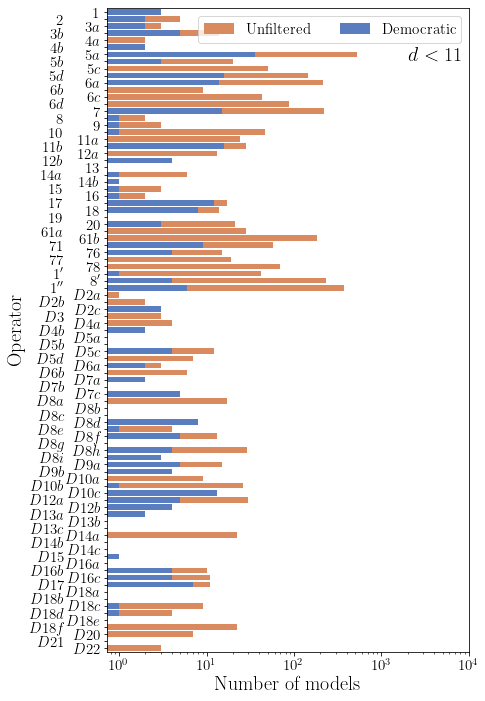

In [28]:
ops_filter_bar_df = filter_bar_df[filter_bar_df["Dimension"] < 11]

f, ax = plt.subplots(figsize=(7, 10))

sns.barplot(x="Unfiltered", y="Operator", data=ops_filter_bar_df, label="Unfiltered", color=sns.color_palette()[1])
sns.barplot(x="Democratic", y="Operator", data=ops_filter_bar_df, label="Democratic", color=sns.color_palette()[0])
ax.set_xscale("log")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 10000), ylabel="Operator", xlabel="Number of models")

ax.text(x=2000, y=7, s="$d < 11$", fontsize=20)
    
for tick in ax.yaxis.get_major_ticks()[1::2]:
    tick.set_pad(40)

plt.tight_layout()
plt.savefig("/home/garj/filter_barchart_operators579.pdf")
plt.savefig("/home/garj/filter_barchart_operators579.png")

/usr/local/easybuild-2019/easybuild/software/mpi/gcc/8.3.0/openmpi/3.1.4/jupyter/1.0.0-python-3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


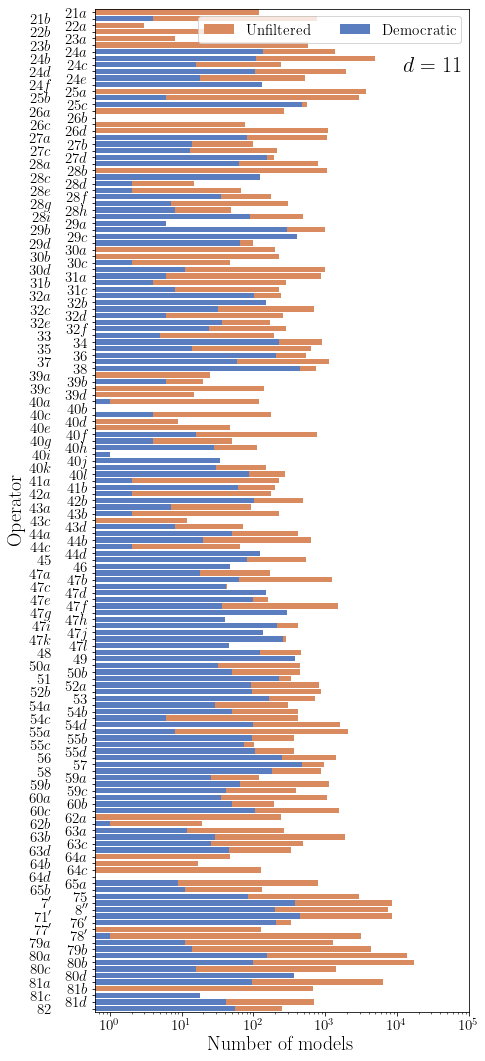

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

ops_filter_bar_df = filter_bar_df[filter_bar_df["Dimension"] == 11]

f, ax = plt.subplots(figsize=(7, 15))

sns.barplot(x="Unfiltered", y="Operator", data=ops_filter_bar_df, label="Unfiltered", color=sns.color_palette()[1])
sns.barplot(x="Democratic", y="Operator", data=ops_filter_bar_df, label="Democratic", color=sns.color_palette()[0])
ax.set_xscale("log")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 100000), ylabel="Operator", xlabel="Number of models")

ax.text(x=12000, y=9, s="$d = 11$", fontsize=22)
    
for tick in ax.yaxis.get_major_ticks()[1::2]:
    tick.set_pad(40)

plt.tight_layout()
plt.savefig("/home/garj/filter_barchart_operators11.pdf")
plt.savefig("/home/garj/filter_barchart_operators11.png")